In [1]:
pip install pandas


In [7]:
import pandas as pd
import numpy as np

In [8]:
data= {
    'ID': np.arange(1, 1000001),
    'Value': np.random.rand(1000000),
    'Category': np.random.choice(['A', 'B', 'C','D'], size=1000000)
}


In [9]:
df=pd.DataFrame(data)

In [10]:
df

,ID,Value,Category
0,1,0.812578,B
1,2,0.645829,A
2,3,0.332427,D
3,4,0.126007,A
4,5,0.623831,C
...,...,...,...
999995,999996,0.640345,C
999996,999997,0.954616,D
999997,999998,0.528180,B
999998,999999,0.615027,B


In [11]:
print(df.head(10))

   ID     Value Category
0   1  0.812578        B
1   2  0.645829        A
2   3  0.332427        D
3   4  0.126007        A
4   5  0.623831        C
5   6  0.098193        A
6   7  0.161795        D
7   8  0.628085        A
8   9  0.358849        B
9  10  0.279509        A


In [13]:
print(df['Value'])

0         0.812578
1         0.645829
2         0.332427
3         0.126007
4         0.623831
            ...   
999995    0.640345
999996    0.954616
999997    0.528180
999998    0.615027
999999    0.510407
Name: Value, Length: 1000000, dtype: float64


In [15]:
df.columns=['ID number','Random name','Choice']

In [16]:
df.head(5)

,ID number,Random name,Choice
0,1,0.812578,B
1,2,0.645829,A
2,3,0.332427,D
3,4,0.126007,A
4,5,0.623831,C


In [17]:
pd.set_option('display.max_columns',None)
student_data=pd.DataFrame({
    'school_code':['s001','s002','s003','s001','s002','s004'],
    'class':['V','V','VI','VI','V','VI'],
    'name':['Alberto Franco','Gino Mcneill','Ryan Parkes','Eesha Hinton','Gino Mcneill','David Parkes'],
    'date_of_Birth':['15/05/2002','17/05/2002','16/02/1999','25/09/1998','11/05/2002','15/09/1997'],
    'age':[12,12,13,13,14,12],
    'height':[173,192,186,167,151,159],
    'weight':[35,32,33,30,31,32],
    'address':['street1','street2','street3','street1','street2','street4']},
                          index=['S1','S2','S3','S4','S5','S6']
)
print("Original DataFrame:")
print(student_data)
print("\nSplit the said data on school_code, class wise:")
result=student_data.groupby(['school_code','class'])
for name,group in result:
    print("\nGroup:")
    print(name)
    print(group)


Original DataFrame:
   school_code class            name date_of_Birth  age  height  weight  \
S1        s001     V  Alberto Franco    15/05/2002   12     173      35   
S2        s002     V    Gino Mcneill    17/05/2002   12     192      32   
S3        s003    VI     Ryan Parkes    16/02/1999   13     186      33   
S4        s001    VI    Eesha Hinton    25/09/1998   13     167      30   
S5        s002     V    Gino Mcneill    11/05/2002   14     151      31   
S6        s004    VI    David Parkes    15/09/1997   12     159      32   

    address  
S1  street1  
S2  street2  
S3  street3  
S4  street1  
S5  street2  
S6  street4  

Split the said data on school_code, class wise:

Group:
('s001', 'V')
   school_code class            name date_of_Birth  age  height  weight  \
S1        s001     V  Alberto Franco    15/05/2002   12     173      35   

    address  
S1  street1  

Group:
('s001', 'VI')
   school_code class          name date_of_Birth  age  height  weight  address
S4  

In [20]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
datacsv=pd.read_csv('/content/drive/My Drive/data.csv')

In [27]:
description=datacsv.describe()
print(description)

         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [28]:
datacsv.isnull().values.any()

True

In [29]:
mean_values = datacsv.mean()

# Replace null values with the mean of the respective column
datacsv.fillna(mean_values, inplace=True)

# Display the DataFrame after replacing null values
print("\nDataFrame after replacing null values with mean:")
print(datacsv.head())


DataFrame after replacing null values with mean:
   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0


In [30]:
# Selecting two columns for aggregation
s_col = datacsv[['Duration', 'Calories']]

# Aggregate the data using min, max, count, and mean
aggregation = s_col.agg(['min', 'max', 'count', 'mean'])

# Display the aggregated data
print(aggregation)

         Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


In [32]:
#Filter the dataframe to select the rows with calories values between 500 and 1000.
filtered_df = datacsv[(datacsv['Calories'] >= 500) & (datacsv['Calories'] <= 1000)]

# Display the filtered DataFrame
print(filtered_df)

     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [33]:
#Filter the dataframe to select the rows with calories values >500 and pulse < 100
filtered_df = datacsv[(datacsv['Calories'] > 500) & (datacsv['Pulse'] < 100)]

# Display the filtered DataFrame
print(filtered_df)

     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [36]:
#Create a new data frame that contains all columns from previous dataframe except for "Maxpulse"
df_modified = datacsv.drop(columns=['Maxpulse'])
print(df_modified.head())

   Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0


In [38]:
#Delete the Maxpulse column from the main dataframe
datacsv.drop(columns=['Maxpulse'], inplace=True)
print(datacsv.head())


   Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0


In [39]:
#Convert the datatype of Calories column to int datatype.
datacsv['Calories'] = datacsv['Calories'].astype(int)

# Display the DataFrame after conversion
print("\nDataFrame after converting 'Calories' to int datatype:")
print(datacsv.head())


DataFrame after converting 'Calories' to int datatype:
   Duration  Pulse  Calories
0        60    110       409
1        60    117       479
2        60    103       340
3        45    109       282
4        45    117       406


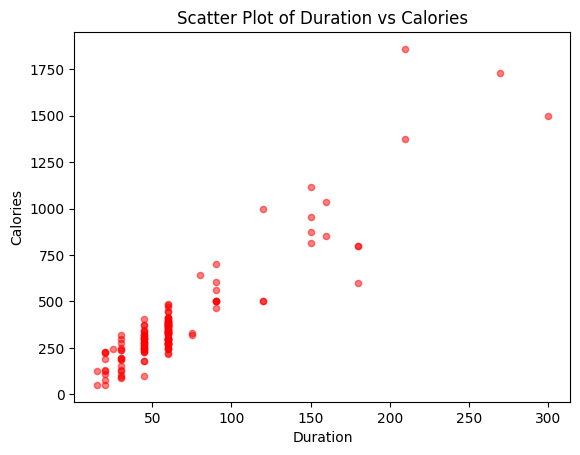

In [41]:
import matplotlib.pyplot as plt

# Create a scatter plot for 'Duration' vs 'Calories'
datacsv.plot(kind='scatter', x='Duration', y='Calories', color='red', alpha=0.5)

# Add title and labels
plt.title('Scatter Plot of Duration vs Calories')
plt.xlabel('Duration')
plt.ylabel('Calories')

# Display the plot
plt.show()